<a href="https://colab.research.google.com/github/bartlomiejcerek/tweets_analyser/blob/master/scripts/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import pandas as pd
import numpy as np
import time

In [0]:
#Just for colab
from google.colab import files
uploaded = files.upload()

Saving twitter_dat.txt to twitter_dat (1).txt


In [0]:
feature_df = pd.read_csv(io.BytesIO(uploaded['twitter_dat.txt']), sep=';', index_col=0)
feature_df

In [0]:
#Preparing binary classifier
not_justin = feature_df['author'] != 'justinbieber'
feature_df['author'][not_justin] = 'not Justin :('
# feature_df['author'][feature_df['author'] == 'justinbieber']

In [0]:
#Changing data type
import ast 

def change_str_col_with_list_type(column):
  list_type_col = []
  for row in column:
    list_type_col.append(ast.literal_eval(row))
  return list_type_col

In [0]:
#Data split
from sklearn.model_selection import train_test_split

#1st approach - all the data
# X = change_str_col_with_list_type(feature_df['encoded_tweet_long'])
# y = feature_df['author']

#2nd approach - equal data set for Bieber and others
not_justin_sample = feature_df[not_justin].sample(n=2000)
justin_sample = feature_df[feature_df['author'] == 'justinbieber']

sample = pd.concat([not_justin_sample, justin_sample])

# sample = pd.DataFrame(np.hstack((not_justin_sample, justin_sample))index=np.hstack((not_justin_sample.index, justin_sample.index)))
X = change_str_col_with_list_type(sample['encoded_tweet_short'])
y = sample['author']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X)


[[2294, 259, 62, 558, 1, 5, 18684, 10178, 161, 2129, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5138, 13820, 2779, 324, 228, 8980, 1161, 866, 1756, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [183, 4, 286, 876, 1676, 203, 235, 744, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [122, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [69, 56, 20, 182, 138, 3, 165, 75, 3, 251, 3722, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 905, 94, 565, 17, 7, 11418, 376, 2287, 470, 43, 689, 16, 11419, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [60, 2838, 2247, 260, 1510, 73, 17157, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8381, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [288, 109, 103, 480, 2792, 20, 29, 12192, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [432, 73, 229, 5568, 85, 46, 9, 994, 466, 3189, 83, 0, 0, 0

In [0]:
# def show_summary(predrictions, y_test):
#   acc = accuracy_score(pred, y_test)
#   cm = confusion_matrix(y_test, pred)
#   f = np.sum(cm, axis =1)
#   cm = cm / f *100
#   print('Accuracy: {:.2f}%'.format(acc*100))
#   print(predrictions)
#   fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
#   ax = sns.heatmap(cm, annot=True, ax = ax, fmt='.2f')

Accuracy: 60.12%


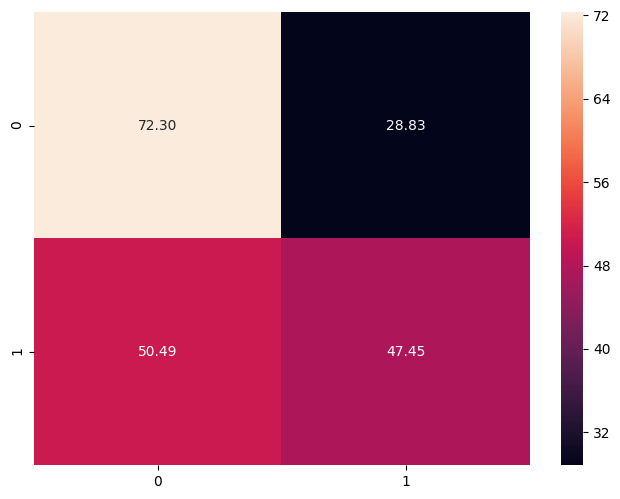

In [0]:
#Naive Bayes
#encoded_tweet_long as param
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc = accuracy_score(pred, y_test)
cm = confusion_matrix(y_test, pred)
f = np.sum(cm, axis =1)
cm = cm / f *100
print('Accuracy: {:.2f}%'.format(acc*100))
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
ax = sns.heatmap(cm, annot=True, ax = ax, fmt='.2f')

Accuracy: 71.00%


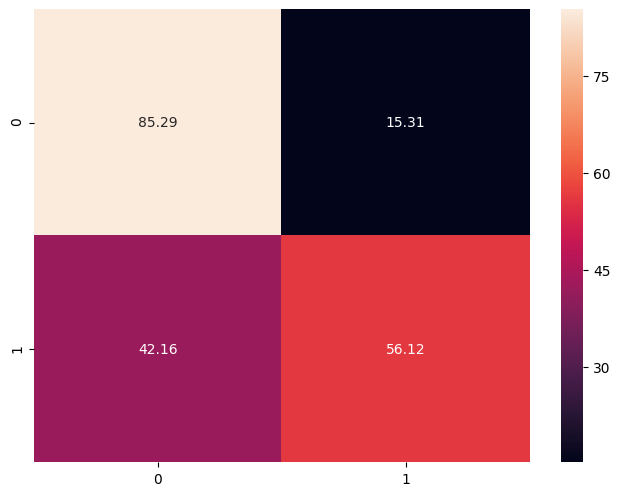

In [0]:
clf2 = svm.LinearSVC(C=0.84, max_iter=10000,dual = False, random_state=0)
clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)
acc2 = accuracy_score(pred2, y_test)
cm2 = confusion_matrix(y_test, pred2)
f2 = np.sum(cm2, axis =1)
cm2 = cm2 / f2 *100
print('Accuracy: {:.2f}%'.format(acc2*100))
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
ax = sns.heatmap(cm2, annot=True, ax = ax, fmt='.2f')

Accuracy: 73.12%


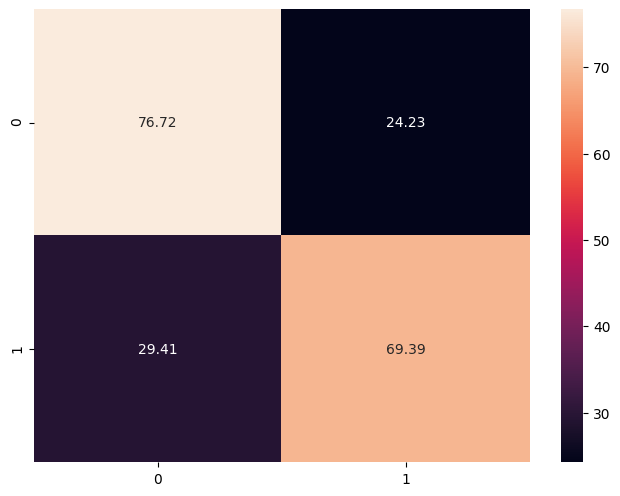

In [0]:
from sklearn import neighbors
clf3 = neighbors.KNeighborsClassifier()
clf3.fit(X_train, y_train)
pred3 = clf3.predict(X_test)
acc3 = accuracy_score(pred3, y_test)
cm3 = confusion_matrix(y_test, pred3)
f3 = np.sum(cm3, axis =1)
cm3 = cm3 / f3 *100
print('Accuracy: {:.2f}%'.format(acc3*100))
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
ax = sns.heatmap(cm3, annot=True, ax = ax, fmt='.2f')

Accuracy: 74.00%


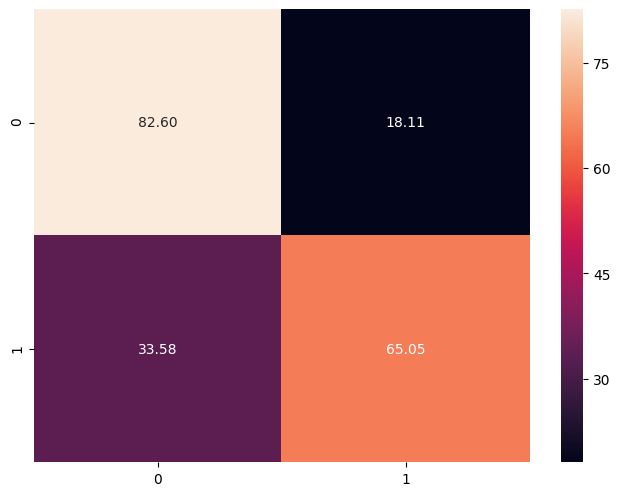

In [0]:
from sklearn import svm
clf4 = svm.SVC(kernel = 'rbf', max_iter=10000)
clf4.fit(X_train, y_train)
pred4 = clf4.predict(X_test)
acc4 = accuracy_score(pred4, y_test)
cm4 = confusion_matrix(y_test, pred4)
f4 = np.sum(cm4, axis =1)
cm4 = cm4 / f4 *100
print('Accuracy: {:.2f}%'.format(acc4*100))
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
ax = sns.heatmap(cm4, annot=True, ax = ax, fmt='.2f')

Accuracy: 76.50%


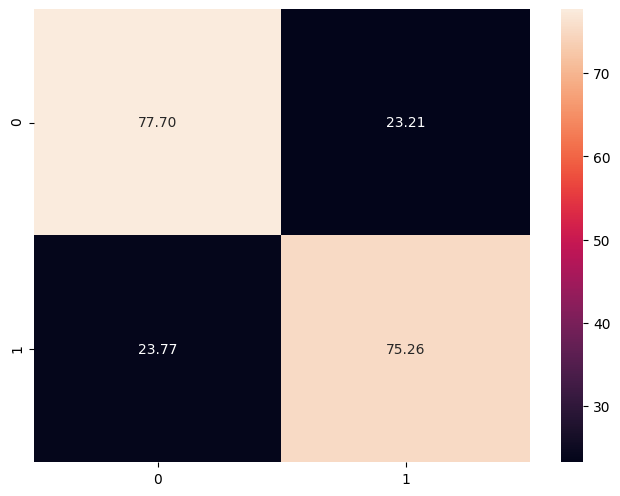

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier(n_estimators = 1000, criterion='entropy', max_features=None)

clf5.fit(X_train, y_train)
pred5 = clf5.predict(X_test)
acc5 = accuracy_score(pred5, y_test)
cm5 = confusion_matrix(y_test, pred5)
f5 = np.sum(cm5, axis =1)
cm5 = cm5 / f5 *100
print('Accuracy: {:.2f}%'.format(acc5*100))
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
ax = sns.heatmap(cm5, annot=True, ax = ax, fmt='.2f')

Accuracy: 74.12%


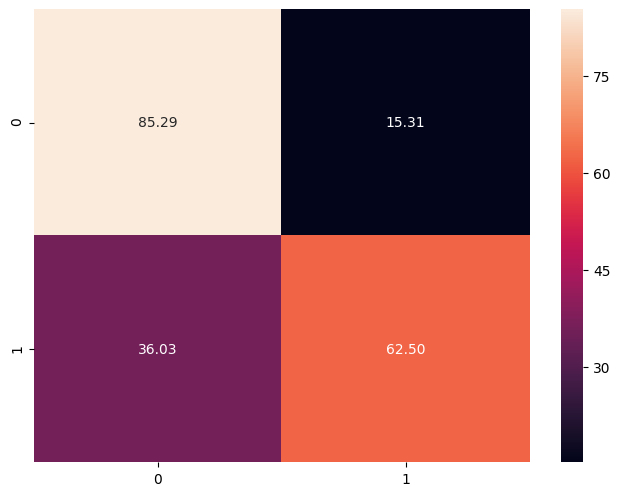

In [0]:
from sklearn.svm import NuSVC
clf6 = NuSVC()
clf6.fit(X_train, y_train)
pred6= clf6.predict(X_test)
acc6 = accuracy_score(pred6, y_test)
cm6 = confusion_matrix(y_test, pred6)
f6 = np.sum(cm6, axis =1)
cm6 = cm6 / f6 *100
print('Accuracy: {:.2f}%'.format(acc6*100))
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
ax = sns.heatmap(cm6, annot=True, ax = ax, fmt='.2f')

In [0]:
def predict_tweet(vector, classifier_type):
  # X_to_predict = change_str_col_with_list_type(vector['encoded_tweet_short'])
  X_to_predict = np.array(ast.literal_eval(vector)).reshape(1,26)
  if classifier_type == 'bayes':
    classifier = clf
  elif classifier_type == 'linearSVC':
    classifier = clf2   
  elif classifier_type == 'kneighbors':
    classifier = clf3
  elif classifier_type == 'rbfSVC':
    classifier = clf4
  elif classifier_type == 'randomForest':
    classifier = clf
  prediction= classifier.predict(X_to_predict)
  return prediction

tweet_number = 2928    
vector = feature_df.iloc[tweet_number]['encoded_tweet_short']
classifier = 'randomForest'
print('Predicted author: %s \nActual author: %s \nClassifier: %s.\n' %(predict_tweet(vector, classifier)[0],feature_df.iloc[tweet_number][0], classifier))

tweet_number = 7322
vector = feature_df.iloc[tweet_number]['encoded_tweet_short']
classifier = 'bayes'
print('Predicted author: %s \nActual author: %s \nClassifier: %s.\n' %(predict_tweet(vector, classifier)[0],feature_df.iloc[tweet_number][0], classifier))

In [0]:
# clf = LogisticRegression(penalty='l2', tol=0.0001, C=1.0)
